<a href="https://colab.research.google.com/github/FerdousJUST/ImageClassificationCoding-2023-/blob/main/ImageClassification_Code05(RESTNET50).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [4]:
data_dir = "/content/drive/MyDrive/Image_Classification_Dataset/Training01"

In [5]:
img_height = 128
img_width = 128
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    label_mode = 'categorical',
    image_size = (128,128),
    batch_size = 32

)


Found 4800 files belonging to 4 classes.
Using 3840 files for training.


In [6]:
img_height = 128
img_width = 128
batch_size = 32
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    label_mode = 'categorical',
    image_size = (128,128),
    batch_size = 32

)

Found 4800 files belonging to 4 classes.
Using 960 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Barbel_Fish', 'Hilsha_Fish', 'Spotted_Snakehead_Fish', 'Tilapia_Fish']


In [8]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape = (128,128,3),
                                                  pooling = 'avg',classes=4,
                                                  weights = 'imagenet')

for layer in pretrained_model.layers:
  layer.trainable = False


resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(4,activation = 'softmax'))

94765736/94765736 [==============================] - 5s 0us/step


In [9]:

resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 4)                 2052      
 apper)                                                          
                                                                 
Total params: 24638852 (93.99 MB)
Trainable params: 1051140 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

In [10]:
resnet_model.compile(optimizer = Adam(lr=0.001),loss='categorical_crossentropy',metrics = ['accuracy'])

In [11]:

epochs = 10
history = resnet_model.fit(train_ds,
                           validation_data=val_ds,
                           epochs = epochs
                           )

Epoch 1/10
120/120 [==============================] - 1489s 12s/step - loss: 0.3572 - accuracy: 0.9247 - val_loss: 0.0517 - val_accuracy: 0.9812
Epoch 2/10
120/120 [==============================] - 17s 137ms/step - loss: 0.0250 - accuracy: 0.9927 - val_loss: 0.0316 - val_accuracy: 0.9927
Epoch 3/10
120/120 [==============================] - 17s 140ms/step - loss: 0.0095 - accuracy: 0.9982 - val_loss: 0.0183 - val_accuracy: 0.9927
Epoch 4/10
120/120 [==============================] - 18s 148ms/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 0.0200 - val_accuracy: 0.9927
Epoch 5/10
120/120 [==============================] - 17s 139ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0117 - val_accuracy: 0.9927
Epoch 6/10
120/120 [==============================] - 17s 136ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9958
Epoch 7/10
120/120 [==============================] - 19s 157ms/step - loss: 8.4194e-04 - accuracy: 1.0000 - val_loss: 0.0085 - va

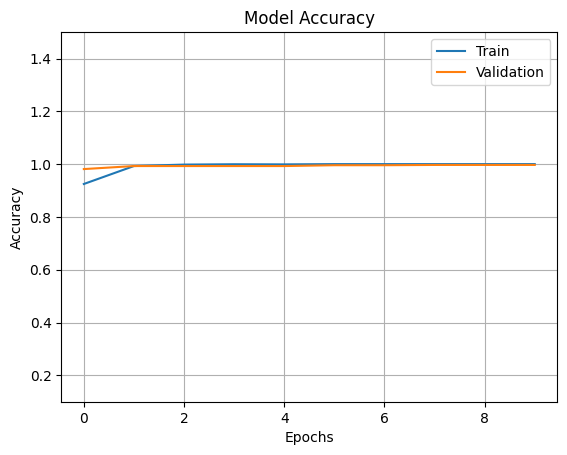

In [12]:

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin = 0.1,ymax =1.5)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show()

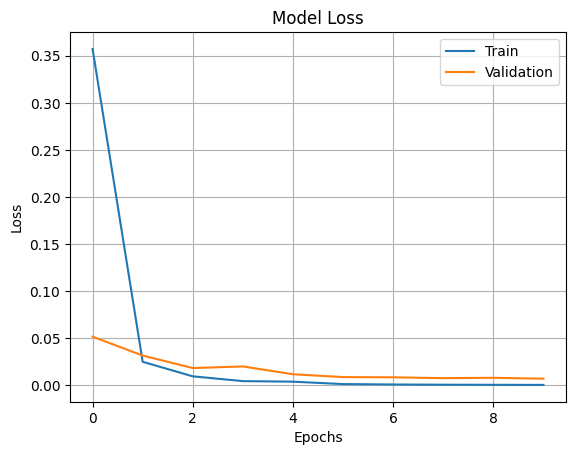

In [13]:

fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show()

<ipython-input-14-51bfd9888470>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(history.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
<ipython-input-14-51bfd9888470>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(history.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)


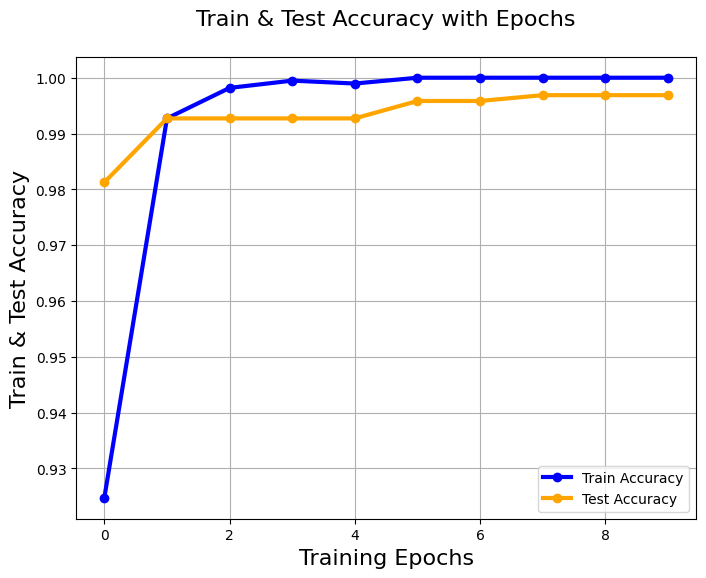

In [14]:
plt.figure(figsize = (8,6))
plt.plot(history.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Train & Test Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Accuracy",fontsize =16)
plt.show()

<ipython-input-15-ff5de9c6dc51>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(history.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
<ipython-input-15-ff5de9c6dc51>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(history.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)


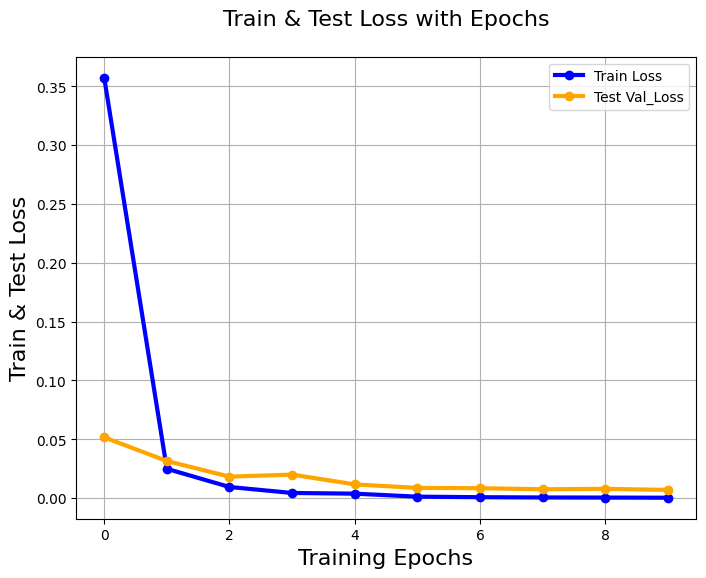

In [15]:

plt.figure(figsize = (8,6))
plt.plot(history.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(history.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,20)
plt.legend(['Train Loss', 'Test Val_Loss'], loc='upper right')
plt.title("Train & Test Loss with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Loss",fontsize =16)
plt.show()

In [16]:
acc = resnet_model.evaluate(val_ds,steps = len(val_ds),verbose = 2)
print('%.2f'%(acc[1]*100))

30/30 - 3s - loss: 0.0070 - accuracy: 0.9969 - 3s/epoch - 106ms/step
99.69


In [17]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/MyDrive/Image_Classification_Dataset/Training/Tilapia_Fish/Tilapia_Fish 004.png',
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = resnet_model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']


for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 2s 2s/step
[[8.2479671e-14 5.2636308e-13 1.6514872e-12 1.0000000e+00]]
[3, 2, 1, 0]
Tilapia_Fish : 100.0 %
Spotted_Snakehead_Fish : 0.0 %
Hilsha_Fish : 0.0 %
Barbel_Fish : 0.0 %


In [18]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/MyDrive/Image_Classification_Dataset/Training/Spotted_Snakehead_Fish/Spotted_Fish 003.jpg',
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = resnet_model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']


for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 38ms/step
[[2.3102564e-05 6.2544262e-16 9.9997687e-01 2.9692171e-08]]
[2, 0, 3, 1]
Spotted_Snakehead_Fish : 100.0 %
Barbel_Fish : 0.0 %
Tilapia_Fish : 0.0 %
Hilsha_Fish : 0.0 %


In [20]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/MyDrive/Image_Classification_Dataset/Training/Hilsha_Fish/Hilsha_Fish 003.jpg',
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = resnet_model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']


for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')


1/1 [==============================] - 0s 28ms/step
[[4.4562298e-04 9.9939263e-01 1.6121712e-04 6.1085404e-07]]
[1, 0, 2, 3]
Hilsha_Fish : 99.94 %
Barbel_Fish : 0.04 %
Spotted_Snakehead_Fish : 0.02 %
Tilapia_Fish : 0.0 %


In [21]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/MyDrive/Image_Classification_Dataset/Training/Barbel_Fish/Barbel_Fish 005.jpg',
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = resnet_model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']


for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')


1/1 [==============================] - 0s 25ms/step
[[9.969728e-01 4.350426e-06 2.221086e-03 8.017386e-04]]
[0, 2, 3, 1]
Barbel_Fish : 99.7 %
Spotted_Snakehead_Fish : 0.22 %
Tilapia_Fish : 0.08 %
Hilsha_Fish : 0.0 %


In [22]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/MyDrive/Image_Classification_Dataset/Training/Barbel_Fish/Barbel_Fish 565.jpg',
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = resnet_model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']


for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 26ms/step
[[9.9842286e-01 5.2384294e-08 4.7212758e-04 1.1049967e-03]]
[0, 3, 2, 1]
Barbel_Fish : 99.84 %
Tilapia_Fish : 0.11 %
Spotted_Snakehead_Fish : 0.05 %
Hilsha_Fish : 0.0 %
